In [15]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from fbprophet import Prophet

In [16]:
#data in 3 csv file
#error bad line, skips the lines which causes error
chicago_df_1 = pd.read_csv('Chicago_Crimes_2005_to_2007.csv', error_bad_lines=False)
chicago_df_2 = pd.read_csv('Chicago_Crimes_2008_to_2011.csv',error_bad_lines=False)
chicago_df_3 = pd.read_csv('Chicago_Crimes_2012_to_2017.csv',error_bad_lines=False)

b'Skipping line 533719: expected 23 fields, saw 24\n'
b'Skipping line 1149094: expected 23 fields, saw 41\n'


In [17]:
chicago_df_3.shape

(1456714, 23)

In [18]:
chicago_df = pd.concat([chicago_df_1,chicago_df_2,chicago_df_3])

In [19]:
chicago_df.shape    

(6017767, 23)

In [20]:
chicago_df.head(10)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,4673626,HM274058,04/02/2006 01:00:00 PM,055XX N MANGO AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,45.0,11.0,26,1136872.0,1936499.0,2006,04/15/2016 08:55:02 AM,41.981913,-87.771996,"(41.981912692, -87.771996382)"
1,1,4673627,HM202199,02/26/2006 01:40:48 PM,065XX S RHODES AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,...,20.0,42.0,18,1181027.0,1861693.0,2006,04/15/2016 08:55:02 AM,41.775733,-87.611920,"(41.775732538, -87.611919814)"
2,2,4673628,HM113861,01/08/2006 11:16:00 PM,013XX E 69TH ST,051A,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,...,5.0,69.0,04A,1186023.0,1859609.0,2006,04/15/2016 08:55:02 AM,41.769897,-87.593671,"(41.769897392, -87.593670899)"
3,4,4673629,HM274049,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,...,38.0,17.0,08B,1134772.0,1922299.0,2006,04/15/2016 08:55:02 AM,41.942984,-87.780057,"(41.942984005, -87.780056951)"
4,5,4673630,HM187120,02/17/2006 09:03:14 PM,037XX W 60TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,...,13.0,65.0,18,1152412.0,1864560.0,2006,04/15/2016 08:55:02 AM,41.784211,-87.716745,"(41.784210853, -87.71674491)"
5,6,4673631,HM263167,03/30/2006 10:30:00 PM,014XX W 73RD PL,0560,ASSAULT,SIMPLE,APARTMENT,True,...,17.0,67.0,08A,1167688.0,1855998.0,2006,04/15/2016 08:55:02 AM,41.760401,-87.660982,"(41.760401372, -87.660982392)"
6,7,4673632,HM273234,04/05/2006 12:10:00 PM,050XX N LARAMIE AVE,0460,BATTERY,SIMPLE,"SCHOOL, PUBLIC, BUILDING",True,...,45.0,11.0,08B,1140791.0,1932993.0,2006,04/15/2016 08:55:02 AM,41.972221,-87.757670,"(41.972220564, -87.75766982)"
7,8,4673633,HM275105,04/05/2006 03:00:00 PM,067XX S ROCKWELL ST,0820,THEFT,$500 AND UNDER,STREET,False,...,15.0,66.0,06,1160205.0,1859776.0,2006,04/15/2016 08:55:02 AM,41.770926,-87.688304,"(41.770925978, -87.688304107)"
8,9,4673634,HM275063,04/05/2006 09:30:00 PM,019XX W CHICAGO AVE,0560,ASSAULT,SIMPLE,PARKING LOT/GARAGE(NON.RESID.),False,...,32.0,24.0,08A,1163122.0,1905349.0,2006,04/15/2016 08:55:02 AM,41.895923,-87.676334,"(41.895922672, -87.676333733)"
9,10,4673635,HM268513,04/03/2006 03:00:00 AM,063XX S EBERHART AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,...,20.0,42.0,08B,1180669.0,1863047.0,2006,04/15/2016 08:55:02 AM,41.779456,-87.613191,"(41.77945628, -87.613190628)"


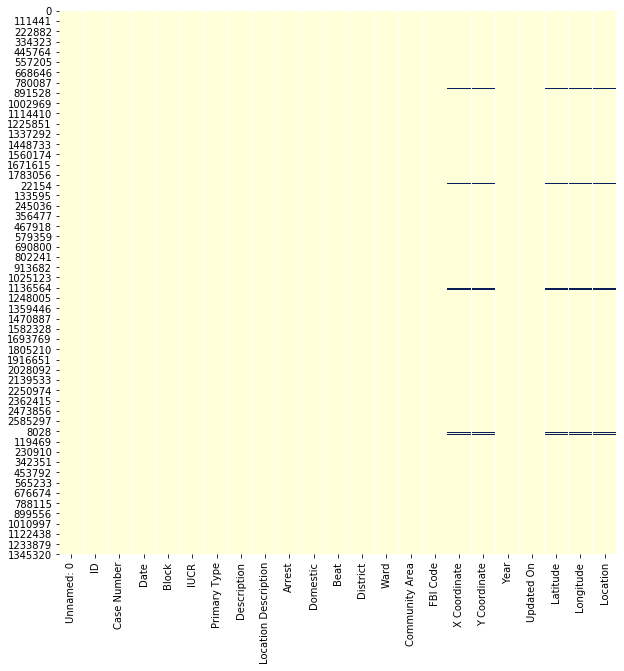

In [10]:
# exploring the data

plt.figure(figsize = (10,10))
sns.heatmap(chicago_df.isnull(), cbar = False, cmap = 'YlGnBu')

In [21]:
chicago_df.drop(['Unnamed: 0','Case Number','ID','IUCR','X Coordinate','Y Coordinate','Updated On','Year','Beat','FBI Code','Ward','Community Area','Location','District','Latitude','Longitude','Location'],inplace = True, axis = 1)

In [22]:
chicago_df

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
0,04/02/2006 01:00:00 PM,055XX N MANGO AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False
1,02/26/2006 01:40:48 PM,065XX S RHODES AVE,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False
2,01/08/2006 11:16:00 PM,013XX E 69TH ST,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False
3,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,BATTERY,SIMPLE,RESIDENCE,False,False
4,02/17/2006 09:03:14 PM,037XX W 60TH ST,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False
5,03/30/2006 10:30:00 PM,014XX W 73RD PL,ASSAULT,SIMPLE,APARTMENT,True,False
6,04/05/2006 12:10:00 PM,050XX N LARAMIE AVE,BATTERY,SIMPLE,"SCHOOL, PUBLIC, BUILDING",True,False
7,04/05/2006 03:00:00 PM,067XX S ROCKWELL ST,THEFT,$500 AND UNDER,STREET,False,False
8,04/05/2006 09:30:00 PM,019XX W CHICAGO AVE,ASSAULT,SIMPLE,PARKING LOT/GARAGE(NON.RESID.),False,False
9,04/03/2006 03:00:00 AM,063XX S EBERHART AVE,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,True


In [23]:
#arrange the date column in date time format

chicago_df.Date = pd.to_datetime(chicago_df.Date, format = '%m/%d/%Y %I:%M:%S %p')

In [24]:
chicago_df.Date

0         2006-04-02 13:00:00
1         2006-02-26 13:40:48
2         2006-01-08 23:16:00
3         2006-04-05 18:45:00
4         2006-02-17 21:03:14
5         2006-03-30 22:30:00
6         2006-04-05 12:10:00
7         2006-04-05 15:00:00
8         2006-04-05 21:30:00
9         2006-04-03 03:00:00
10        2006-04-06 11:15:00
11        2006-04-04 20:15:00
12        2006-04-06 11:30:00
13        2006-02-26 14:47:21
14        2006-04-03 20:09:00
15        2006-02-17 21:26:33
16        2006-04-05 08:00:00
17        2006-03-31 08:20:00
18        2006-04-05 13:30:00
19        2006-03-31 05:00:00
20        2006-03-28 22:00:00
21        2006-02-17 21:49:21
22        2006-04-05 18:18:00
23        2006-04-06 09:45:00
24        2006-03-31 09:13:54
25        2006-04-05 22:30:00
26        2006-04-05 22:10:00
27        2006-03-31 10:00:00
28        2006-02-17 22:07:09
29        2006-04-05 17:00:00
                  ...        
1456684   2016-05-03 22:32:00
1456685   2016-05-03 22:07:00
1456686   

In [35]:
chicago_df.index = pd.DatetimeIndex(chicago_df.Date)

In [36]:
chicago_df

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
Date,,,,,,,
2006-04-02 13:00:00,2006-04-02 13:00:00,055XX N MANGO AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False
2006-02-26 13:40:48,2006-02-26 13:40:48,065XX S RHODES AVE,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False
2006-01-08 23:16:00,2006-01-08 23:16:00,013XX E 69TH ST,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False
2006-04-05 18:45:00,2006-04-05 18:45:00,061XX W NEWPORT AVE,BATTERY,SIMPLE,RESIDENCE,False,False
2006-02-17 21:03:14,2006-02-17 21:03:14,037XX W 60TH ST,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False
2006-03-30 22:30:00,2006-03-30 22:30:00,014XX W 73RD PL,ASSAULT,SIMPLE,APARTMENT,True,False
2006-04-05 12:10:00,2006-04-05 12:10:00,050XX N LARAMIE AVE,BATTERY,SIMPLE,"SCHOOL, PUBLIC, BUILDING",True,False
2006-04-05 15:00:00,2006-04-05 15:00:00,067XX S ROCKWELL ST,THEFT,$500 AND UNDER,STREET,False,False
2006-04-05 21:30:00,2006-04-05 21:30:00,019XX W CHICAGO AVE,ASSAULT,SIMPLE,PARKING LOT/GARAGE(NON.RESID.),False,False


In [26]:
#visualization

#primary type

chicago_df['Primary Type'].value_counts()

THEFT                                1245111
BATTERY                              1079178
CRIMINAL DAMAGE                       702702
NARCOTICS                             674831
BURGLARY                              369056
OTHER OFFENSE                         368169
ASSAULT                               360244
MOTOR VEHICLE THEFT                   271624
ROBBERY                               229467
DECEPTIVE PRACTICE                    225180
CRIMINAL TRESPASS                     171596
PROSTITUTION                           60735
WEAPONS VIOLATION                      60335
PUBLIC PEACE VIOLATION                 48403
OFFENSE INVOLVING CHILDREN             40260
CRIM SEXUAL ASSAULT                    22789
SEX OFFENSE                            20172
GAMBLING                               14755
INTERFERENCE WITH PUBLIC OFFICER       14009
LIQUOR LAW VIOLATION                   12129
ARSON                                   9269
HOMICIDE                                5879
KIDNAPPING

In [27]:
chicago_df['Primary Type'].value_counts().iloc[:15]

THEFT                         1245111
BATTERY                       1079178
CRIMINAL DAMAGE                702702
NARCOTICS                      674831
BURGLARY                       369056
OTHER OFFENSE                  368169
ASSAULT                        360244
MOTOR VEHICLE THEFT            271624
ROBBERY                        229467
DECEPTIVE PRACTICE             225180
CRIMINAL TRESPASS              171596
PROSTITUTION                    60735
WEAPONS VIOLATION               60335
PUBLIC PEACE VIOLATION          48403
OFFENSE INVOLVING CHILDREN      40260
Name: Primary Type, dtype: int64

In [30]:
order_data = chicago_df['Primary Type'].value_counts().iloc[:15].index

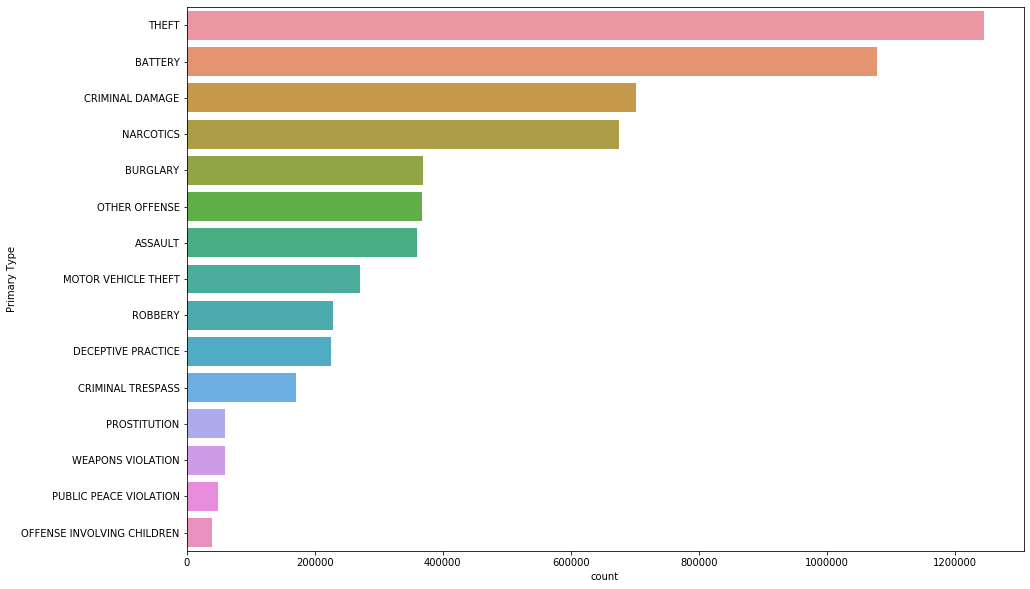

In [31]:
#count plot within sea born
plt.figure(figsize = (15,10))
sns.countplot(y = 'Primary Type', data = chicago_df, order = order_data )

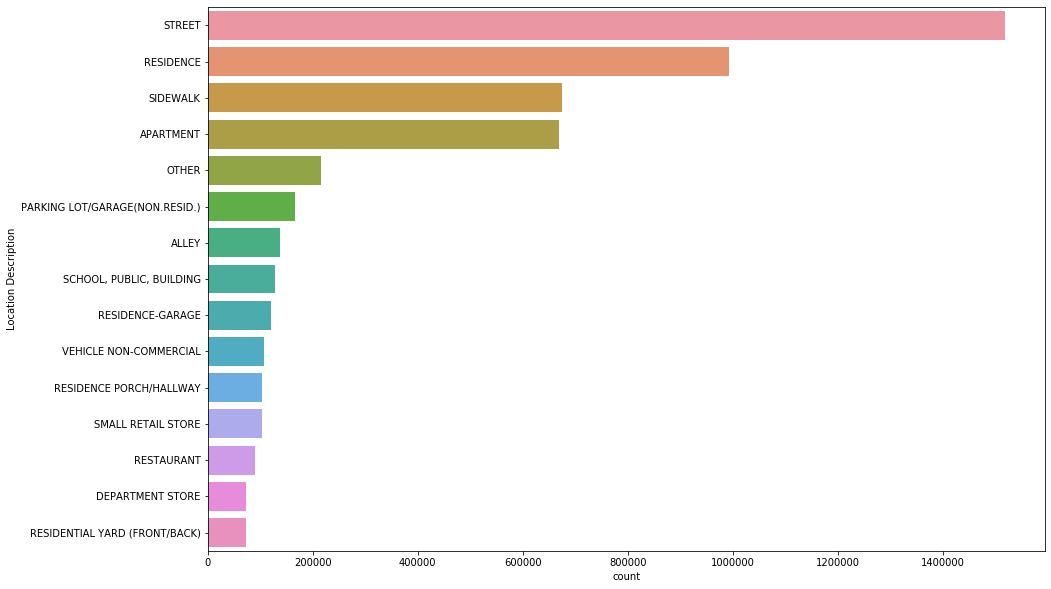

In [33]:
plt.figure(figsize = (15,10))
sns.countplot(y = 'Location Description', data = chicago_df, order = chicago_df['Location Description'].value_counts().iloc[:15].index )

In [38]:
#crimes occured in specefic day/year

year = chicago_df.resample('Y').size()

Text(0, 0.5, 'Number of Crimes')

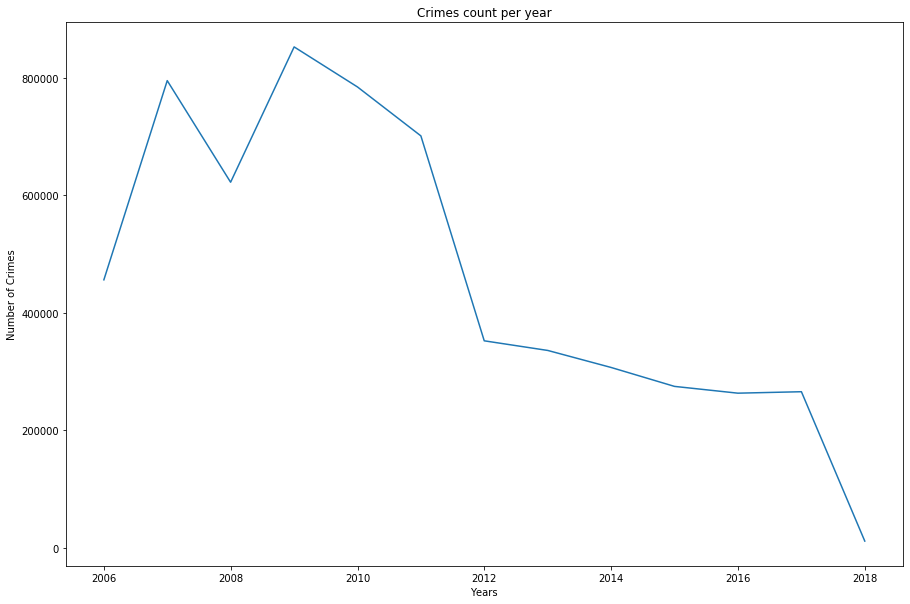

In [51]:
plt.figure(figsize = (15,10))
plt.plot(year)
plt.title('Crimes count per year')
plt.xlabel('Years')
plt.ylabel('Number of Crimes')

In [39]:
day = chicago_df.resample('D').size()

In [40]:
day

Date
2005-01-01    2038
2005-01-02    1075
2005-01-03    1091
2005-01-04    1123
2005-01-05     945
2005-01-06     951
2005-01-07    1146
2005-01-08    1028
2005-01-09    1021
2005-01-10    1183
2005-01-11    1157
2005-01-12    1247
2005-01-13    1207
2005-01-14    1115
2005-01-15    1093
2005-01-16     970
2005-01-17    1059
2005-01-18    1047
2005-01-19    1061
2005-01-20    1057
2005-01-21    1061
2005-01-22     749
2005-01-23     794
2005-01-24    1049
2005-01-25    1248
2005-01-26    1131
2005-01-27    1057
2005-01-28    1090
2005-01-29    1099
2005-01-30    1021
              ... 
2016-12-20     666
2016-12-21     706
2016-12-22     672
2016-12-23     710
2016-12-24     586
2016-12-25     468
2016-12-26     630
2016-12-27     635
2016-12-28     698
2016-12-29     621
2016-12-30     716
2016-12-31     682
2017-01-01     753
2017-01-02     574
2017-01-03     675
2017-01-04     574
2017-01-05     558
2017-01-06     569
2017-01-07     593
2017-01-08     568
2017-01-09     676
2017-01

Text(0, 0.5, 'Number of Crimes')

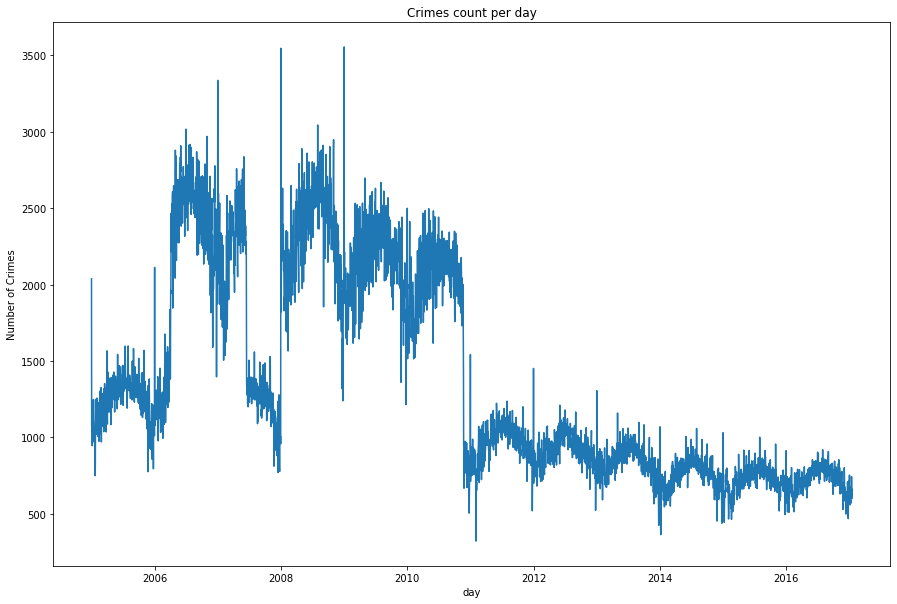

In [46]:
plt.figure(figsize = (15,10))
plt.plot(day)
plt.title('Crimes count per day')
plt.xlabel('day')
plt.ylabel('Number of Crimes')

In [47]:
month = chicago_df.resample('M').size()

Text(0, 0.5, 'Number of Crimes')

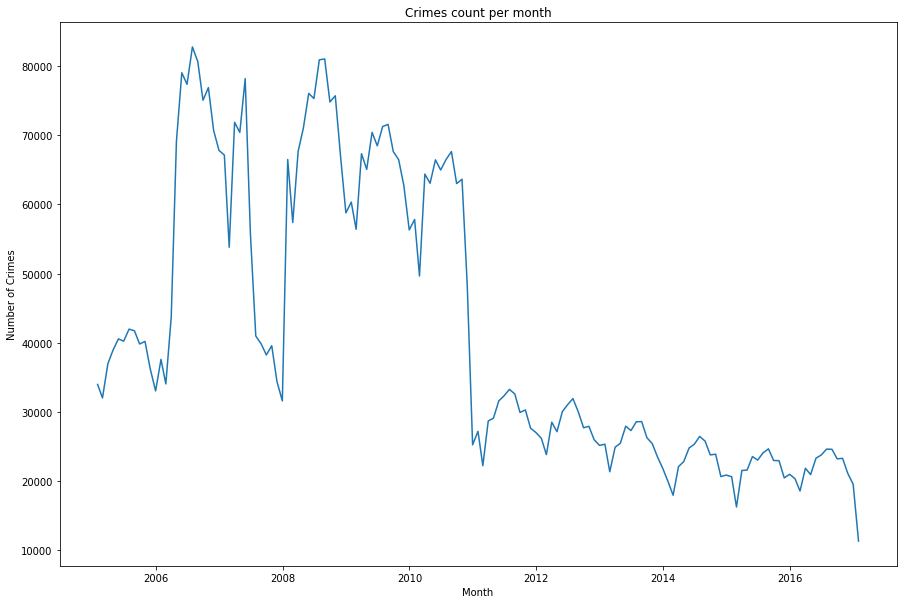

In [55]:
plt.figure(figsize = (15,10))
plt.plot(month)
plt.title('Crimes count per month')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')

In [52]:
quarter  = chicago_df.resample('Q').size()

Text(0, 0.5, 'Number of Crimes')

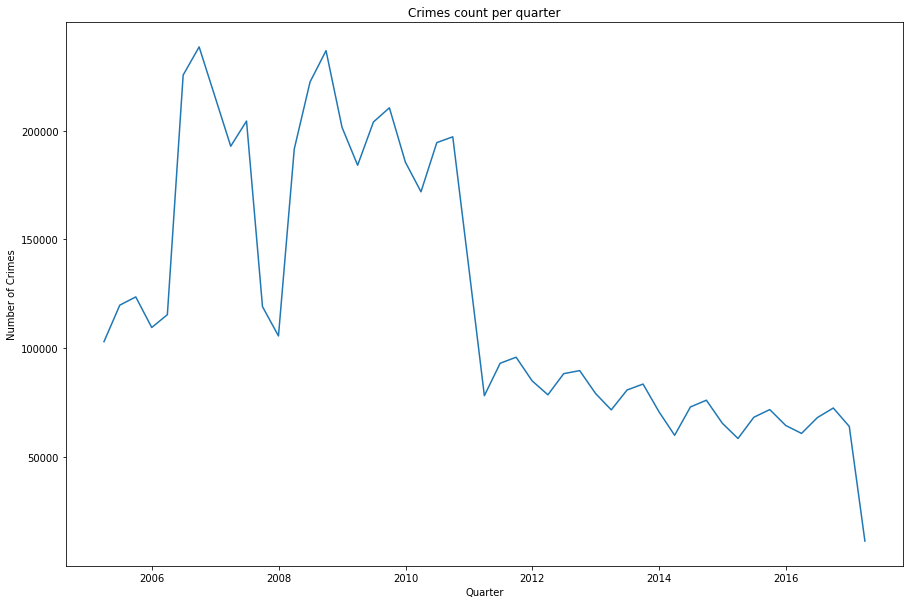

In [56]:
plt.figure(figsize = (15,10))
plt.plot(quarter)
plt.title('Crimes count per quarter')
plt.xlabel('Quarter')
plt.ylabel('Number of Crimes')

In [57]:
chicago_prophet = chicago_df.resample('M').size().reset_index()

In [58]:
chicago_prophet
#date column and count of the crimes per month

,Date,0
0,2005-01-31,33983
1,2005-02-28,32042
2,2005-03-31,36970
3,2005-04-30,38963
4,2005-05-31,40572
5,2005-06-30,40234
6,2005-07-31,41976
7,2005-08-31,41741
8,2005-09-30,39833
9,2005-10-31,40204


In [59]:
#rename the actual header

chicago_prophet.columns = ['Date','Crime Count']

In [60]:
chicago_prophet

,Date,Crime Count
0,2005-01-31,33983
1,2005-02-28,32042
2,2005-03-31,36970
3,2005-04-30,38963
4,2005-05-31,40572
5,2005-06-30,40234
6,2005-07-31,41976
7,2005-08-31,41741
8,2005-09-30,39833
9,2005-10-31,40204


In [65]:
# in order to apply facebook prophet we just need 2 columns
chicago_prophet_df_final = chicago_prophet.rename(columns = {'Date' : 'ds', 'Crime Count' : 'y'})

In [66]:
chicago_prophet_df_final

,ds,y
0,2005-01-31,33983
1,2005-02-28,32042
2,2005-03-31,36970
3,2005-04-30,38963
4,2005-05-31,40572
5,2005-06-30,40234
6,2005-07-31,41976
7,2005-08-31,41741
8,2005-09-30,39833
9,2005-10-31,40204


In [67]:
# applying the facebook prophet
m = Prophet()
#fit the data
m.fit(chicago_prophet_df_final)


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [68]:
future = m.make_future_dataframe(periods = 365)
forecast = m.predict(future)

In [69]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2005-01-31,60454.736755,39661.233677,72763.103730,60454.736755,60454.736755,-4762.400048,-4762.400048,-4762.400048,-4762.400048,-4762.400048,-4762.400048,0.0,0.0,0.0,55692.336707
1,2005-02-28,60322.333828,33913.997746,65162.533722,60322.333828,60322.333828,-9500.508891,-9500.508891,-9500.508891,-9500.508891,-9500.508891,-9500.508891,0.0,0.0,0.0,50821.824937
2,2005-03-31,60175.744873,40939.479656,75620.283178,60175.744873,60175.744873,-1224.148242,-1224.148242,-1224.148242,-1224.148242,-1224.148242,-1224.148242,0.0,0.0,0.0,58951.596630
3,2005-04-30,60033.884593,44768.252340,78722.164849,60033.884593,60033.884593,1182.830385,1182.830385,1182.830385,1182.830385,1182.830385,1182.830385,0.0,0.0,0.0,61216.714978
4,2005-05-31,59887.295638,48767.111980,81558.036192,59887.295638,59887.295638,5498.250108,5498.250108,5498.250108,5498.250108,5498.250108,5498.250108,0.0,0.0,0.0,65385.545746
5,2005-06-30,59745.435359,47605.444096,79867.373450,59745.435359,59745.435359,3576.964865,3576.964865,3576.964865,3576.964865,3576.964865,3576.964865,0.0,0.0,0.0,63322.400224
6,2005-07-31,59598.846404,47189.387648,79873.207365,59598.846404,59598.846404,4582.847461,4582.847461,4582.847461,4582.847461,4582.847461,4582.847461,0.0,0.0,0.0,64181.693865
7,2005-08-31,59452.257449,47158.450208,81175.443975,59452.257449,59452.257449,4498.966275,4498.966275,4498.966275,4498.966275,4498.966275,4498.966275,0.0,0.0,0.0,63951.223724
8,2005-09-30,59310.397170,45208.339029,78180.654577,59310.397170,59310.397170,1749.362601,1749.362601,1749.362601,1749.362601,1749.362601,1749.362601,0.0,0.0,0.0,61059.759771
9,2005-10-31,59163.808215,46017.978503,78627.204936,59163.808215,59163.808215,2397.447880,2397.447880,2397.447880,2397.447880,2397.447880,2397.447880,0.0,0.0,0.0,61561.256094


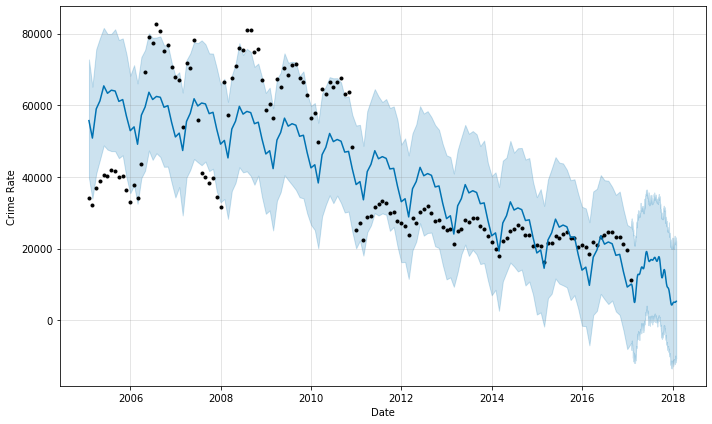

In [70]:
figure = m.plot(forecast, xlabel = 'Date', ylabel = 'Crime Rate')

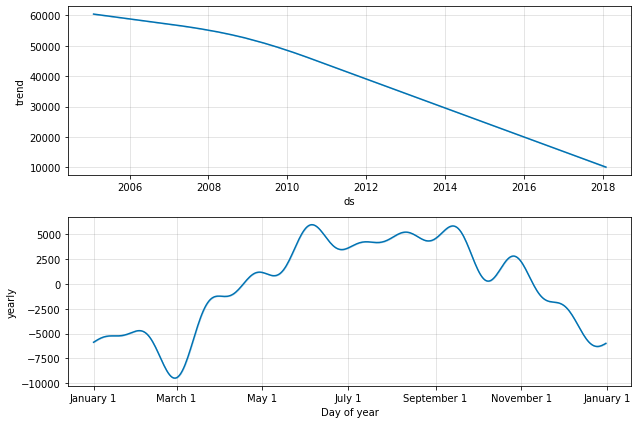

In [71]:
figure = m.plot_components(forecast)

In [72]:
future = m.make_future_dataframe(periods = 720)
forecast = m.predict(future)

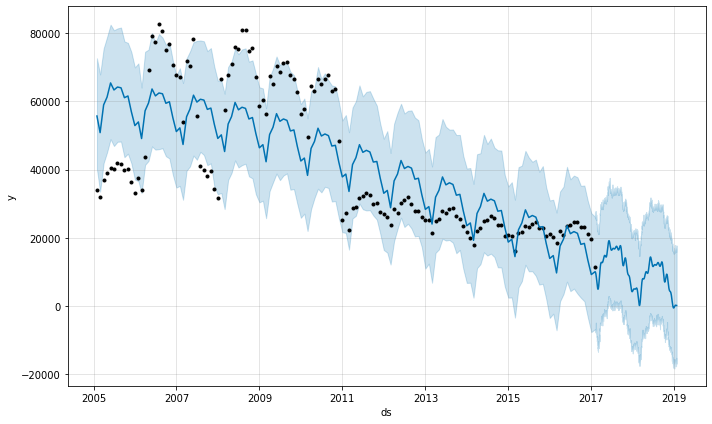

In [73]:
figure = m.plot(forecast)

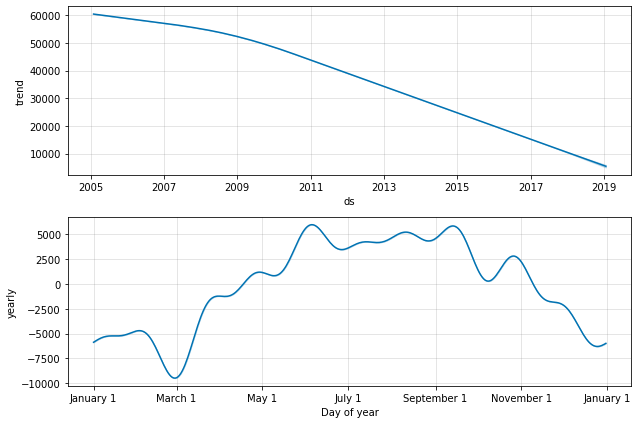

In [74]:
figure = m.plot_components(forecast)